<a href="https://colab.research.google.com/github/Diwakar-Gupta/Data-Science-APRIL/blob/main/22-07-14-CNN/DataAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import tensorflow as tf

In [27]:
IMAGE_SIZE = (240, 240, 3)

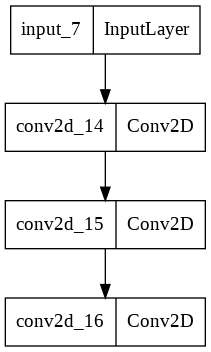

In [28]:
model = tf.keras.Sequential([
            tf.keras.Input(shape=IMAGE_SIZE),
            tf.keras.layers.Conv2D(5, (3,3)),
            tf.keras.layers.Conv2D(3, (3,3)),
            tf.keras.layers.Conv2D(1, (3,3)),
])

tf.keras.utils.plot_model(model)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 240, 240, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 240, 240, 5)  140         ['input_8[0][0]']                
                                                                                                  
 conv2 (Conv2D)                 (None, 240, 240, 3)  138         ['conv1[0][0]']                  
                                                                                                  
 add_1 (Add)                    (None, 240, 240, 3)  0           ['input_8[0][0]',          

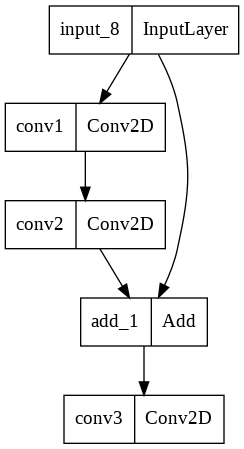

In [29]:
input = tf.keras.Input(shape=IMAGE_SIZE)
conv1 = tf.keras.layers.Conv2D(5, (3,3),padding="SAME", name='conv1')(input)
conv2 = tf.keras.layers.Conv2D(3, (3,3),padding="SAME", name='conv2')(conv1)

add = tf.keras.layers.add([input, conv2])

conv3 = tf.keras.layers.Conv2D(2, (3,3),padding="SAME", name='conv3')(add)


model = tf.keras.Model(inputs=[input], outputs=[conv3])

print(model.summary())
tf.keras.utils.plot_model(model)

https://www.kaggle.com/c/malaria-parasite-detection/data

https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

In [30]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos',origin=dataset_url,untar=True)

In [31]:
data_dir

'/root/.keras/datasets/flower_photos'

In [32]:
! ls /root/.keras/datasets/flower_photos

daisy  dandelion  roses  sunflowers  tulips


In [33]:
! rm /root/.keras/datasets/flower_photos/LICENSE.txt

rm: cannot remove '/root/.keras/datasets/flower_photos/LICENSE.txt': No such file or directory


In [34]:
! ls /root/.keras/datasets/flower_photos

daisy  dandelion  roses  sunflowers  tulips


(500, 333)


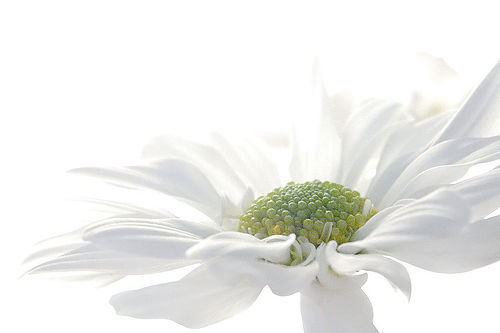

In [35]:
from PIL import Image

img = '/root/.keras/datasets/flower_photos/daisy/11642632_1e7627a2cc.jpg'

im = Image.open(img)
print(im.size)
im

In [36]:
SEED = 89

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    batch_size=32,
    image_size=(256, 256),
    seed = SEED,
    validation_split=0.3,
    subset='training',
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    batch_size=32,
    image_size=(256, 256),
    seed = SEED,
    validation_split=0.3,
    subset='validation',
)

Found 3670 files belonging to 5 classes.
Using 2569 files for training.
Found 3670 files belonging to 5 classes.
Using 1101 files for validation.


https://www.tensorflow.org/tutorials/images/data_augmentation

In [45]:

model = tf.keras.Sequential([
  tf.keras.Input(shape=(256, 256, 3)),
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(5, activation='sigmoid')
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_27 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 64, 64, 64)      

In [46]:
model.compile(
    optimizer='Nadam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [47]:
model.fit(train_ds, epochs=21)

Epoch 1/30
81/81 [==============================] - 7s 70ms/step - loss: 1.4259 - accuracy: 0.4465
Epoch 2/30
81/81 [==============================] - 6s 70ms/step - loss: 0.9567 - accuracy: 0.6333
Epoch 3/30
81/81 [==============================] - 6s 69ms/step - loss: 0.7041 - accuracy: 0.7423
Epoch 4/30
81/81 [==============================] - 6s 70ms/step - loss: 0.4444 - accuracy: 0.8462
Epoch 5/30
81/81 [==============================] - 6s 69ms/step - loss: 0.1847 - accuracy: 0.9362
Epoch 6/30
81/81 [==============================] - 6s 69ms/step - loss: 0.0720 - accuracy: 0.9805
Epoch 7/30
81/81 [==============================] - 6s 69ms/step - loss: 0.3852 - accuracy: 0.8980
Epoch 8/30
81/81 [==============================] - 6s 70ms/step - loss: 0.1409 - accuracy: 0.9545
Epoch 9/30
81/81 [==============================] - 6s 69ms/step - loss: 0.0270 - accuracy: 0.9969
Epoch 10/30
81/81 [==============================] - 6s 69ms/step - loss: 0.0160 - accuracy: 0.9988
Epoch 11/

KeyboardInterrupt: ignored

In [48]:
model.evaluate(validation_ds)

35/35 [==============================] - 2s 57ms/step - loss: 2.6256 - accuracy: 0.5940


[2.6255574226379395, 0.5940054655075073]

In [49]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
])


model_augmentated = tf.keras.Sequential([
  tf.keras.Input(shape=(256, 256, 3)),
  tf.keras.layers.Rescaling(1./255),
  data_augmentation,
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(5, activation='sigmoid')
])

model_augmentated.summary()

model_augmentated.compile(
    optimizer='Nadam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
model_augmentated.fit(train_ds, epochs=21)
model_augmentated.evaluate(validation_ds)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 sequential_11 (Sequential)  (None, 256, 256, 3)       0         
                                                                 
 conv2d_29 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                

[0.848121166229248, 0.7029972672462463]